<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_3/AST_Clase_3_ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 3</h3>
    <h3>Ejercicio 2</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno / Fernando Martínez<p> 
</div>

In [ ]:
# pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 36.8 MB/s 
     |████████████████████████████████| 9.8 MB 21.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
import seaborn as sns
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true,y_pred)}')
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
uploaded=files.upload()

Saving Automated algorithm.PNG to Automated algorithm.PNG


In [ ]:
# Tambien pueden probar con otra serie que se tiene un comportamiento similar ( fuente = https://finance.yahoo.com/quote/META/history?period1=1388534400&period2=1577750400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)
#url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/META.csv'
#df = pd.read_csv(url)
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/Index2018.csv'
df = pd.read_csv(url) 

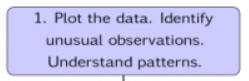

In [ ]:
Image('01BoxJenkins.PNG',width=800)

In [ ]:
df.head(10)

,date,spx,dax,ftse,nikkei
0,7/1/1994,469.90,2224.95,3445.98,18124.01
1,10/1/1994,475.27,2225.00,3440.58,18443.44
2,11/1/1994,474.13,2228.10,3413.77,18485.25
3,12/1/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26
5,14/01/1994,474.91,2151.05,3400.56,18973.70
6,17/01/1994,473.30,2115.56,3407.83,18725.37
7,18/01/1994,474.25,2130.35,3437.01,18514.55
8,19/01/1994,474.30,2132.52,3475.15,19039.40
9,20/01/1994,474.98,2098.36,3469.99,19183.92


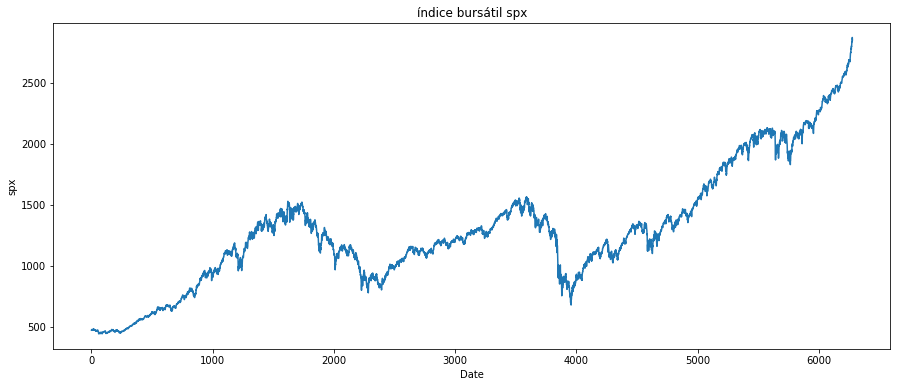

In [ ]:
df["spx"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("spx")
plt.title("índice bursátil spx")
plt.show()

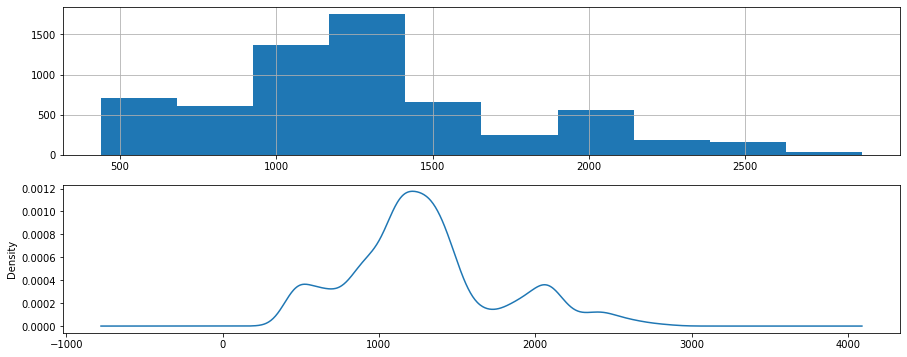

In [ ]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["spx"].hist()
plt.subplot(212)
df["spx"].plot(kind='kde')
plt.show()

# Use automated algorithm.

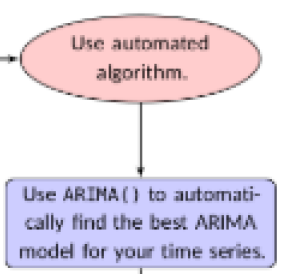

In [ ]:
Image('Automated algorithm.PNG',width=800)

In [ ]:
X = df[['spx' ]]
train, test = X[0:-30], X[-30:]
X.head()

,spx
0,469.90
1,475.27
2,474.13
3,474.17
4,472.47


In [ ]:
stepwise_model1 = auto_arima(train,start_p=1, start_q=1,
max_p=7, max_q=7, seasonal=False,
d=None, trace=True,error_action='ignore',suppress_warnings=True,
stepwise=True)
stepwise_model1.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=50258.389, Time=5.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=50291.585, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=50272.981, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=50271.548, Time=2.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50293.880, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=50260.049, Time=7.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=50260.052, Time=5.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=50266.920, Time=1.67 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=50268.173, Time=0.70 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=50262.049, Time=3.68 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=50262.617, Time=0.79 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 28.396 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6247
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -25125.195
Date:                Thu, 07 Jul 2022   AIC                          50258.389
Time:                        12:48:23   BIC                          50285.348
Sample:                             0   HQIC                         50267.732
                               - 6247                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1174      0.059      1.993      0.046       0.002       0.233
ar.L1          0.6691      0.055     12.156      0.000       0.561       0.777
ma.L1         -0.7265      0.050    -14.404      0.000      -0.825      -0.628
sigma2       182.6074      1.763    103.564      0.000     179.152     186.063
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              7081.96
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
X_diff=X.copy()
data_diff=X_diff.diff(axis = 0, periods = 1)
data_diff.drop([0], inplace=True)

In [ ]:
data_diff

,spx
1,5.370000
2,-1.140000
3,0.040000
4,-1.700000
5,2.440000
...,...
6272,6.156262
6273,-1.586354
6274,1.709023
6275,33.614808


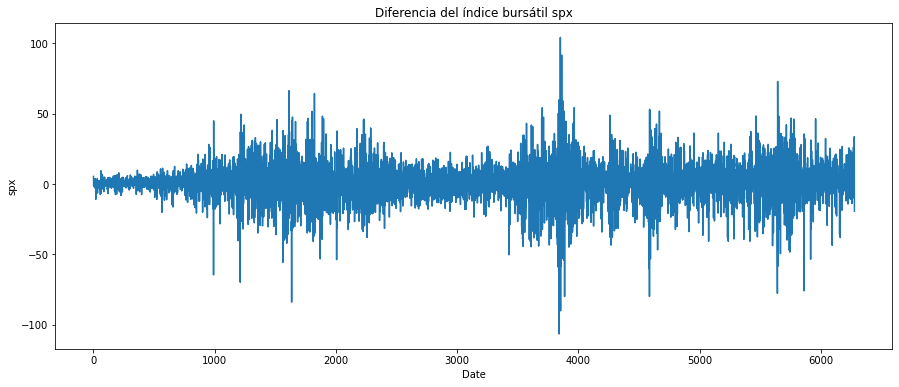

In [ ]:
data_diff["spx"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("spx")
plt.title("Diferencia del índice bursátil spx")
plt.show()

In [ ]:
train_diff, test_diff = data_diff[0:-30], data_diff[-30:]

In [ ]:
data_diff.head()

,spx
1,5.37
2,-1.14
3,0.04
4,-1.70
5,2.44


In [ ]:
stepwise_model2 = auto_arima(train_diff,start_p=1, start_q=1,
max_p=7, max_q=7, seasonal=False,
d=None, trace=True,error_action='ignore',suppress_warnings=True,
stepwise=True)
stepwise_model2.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=50262.616, Time=1.67 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=50293.880, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=50275.791, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=50274.431, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=50264.319, Time=1.88 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=50264.322, Time=2.02 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=50270.157, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=50271.302, Time=0.49 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=50266.313, Time=2.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=50258.389, Time=3.72 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=50271.548, Time=1.72 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=50272.981, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=50260.049, Time=3.83 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=50260.051, Time=3.57 sec
 ARIMA(0,0,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6246
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -25125.194
Date:                Thu, 07 Jul 2022   AIC                          50258.389
Time:                        12:49:02   BIC                          50285.348
Sample:                             0   HQIC                         50267.732
                               - 6246                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1174      0.059      1.993      0.046       0.002       0.233
ar.L1          0.6691      0.055     12.156      0.000       0.561       0.777
ma.L1         -0.7265      0.050    -14.404      0.000      -0.825      -0.628
sigma2       182.6074      1.763    103.564      0.000     179.152     186.063
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              7081.95
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Select model order yourself

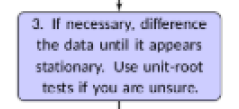

In [ ]:
Image('03BoxJenkins.PNG',width=800)

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['spx'],'spx')

Results of Dickey-Fuller Test for column: spx
Test Statistic                    1.119499
p-value                           0.995380
No Lags Used                     10.000000
Number of Observations Used    6266.000000
Critical Value (1%)              -3.431394
Critical Value (5%)              -2.862001
Critical Value (10%)             -2.567016
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
data_diff.head()

,spx
1,5.37
2,-1.14
3,0.04
4,-1.70
5,2.44


In [ ]:
Augmented_Dickey_Fuller_Test_func(data_diff['spx' ],'spx')

Results of Dickey-Fuller Test for column: spx
Test Statistic                -1.416837e+01
p-value                        2.023543e-26
No Lags Used                   3.400000e+01
Number of Observations Used    6.241000e+03
Critical Value (1%)           -3.431398e+00
Critical Value (5%)           -2.862003e+00
Critical Value (10%)          -2.567017e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


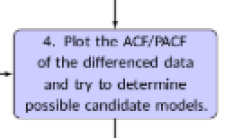

In [ ]:
Image('04BoxJenkins.PNG',width=800)

In [ ]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0] 

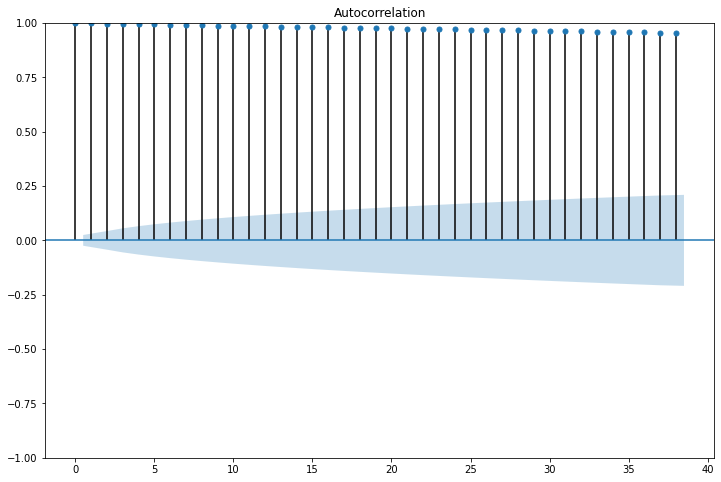

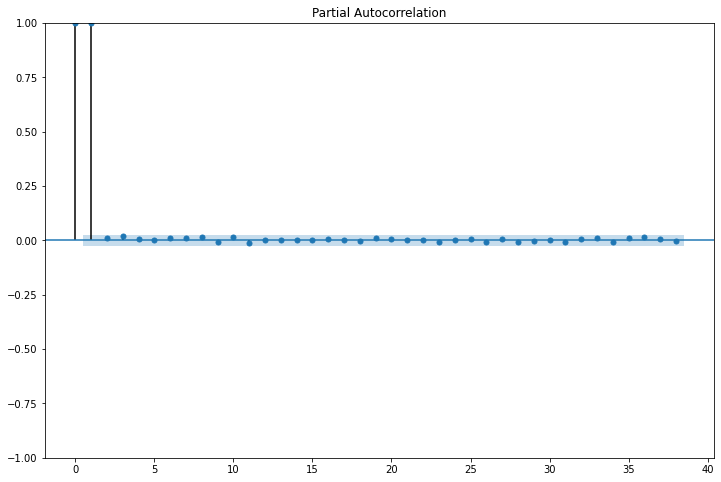

In [ ]:
plot_acf(df['spx' ]);
plot_pacf(df['spx' ]);

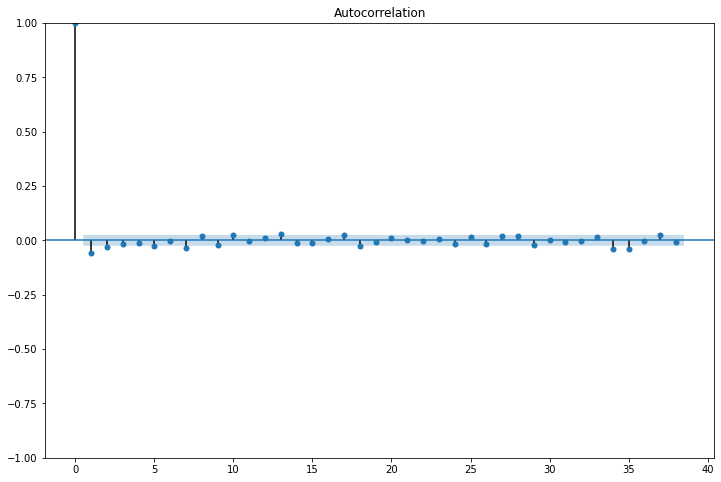

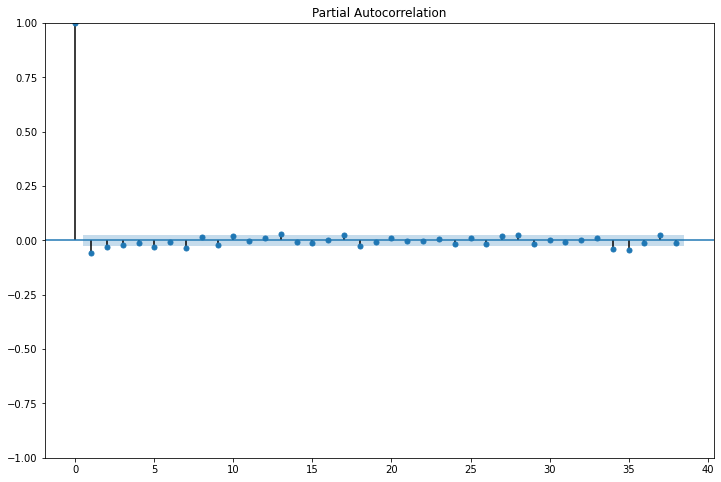

In [ ]:
plot_acf(data_diff['spx' ]);
plot_pacf(data_diff['spx' ]);

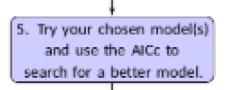

In [ ]:
Image('05BoxJenkins.PNG',width=800)

In [ ]:
from statsmodels.tsa.arima_model import ARMA

import statsmodels.api as sm
model11 = sm.tsa.arima.ARIMA(train_diff.spx, order=(1,0,1))
result11 = model11.fit()

result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6246
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -25125.194
Date:                Thu, 07 Jul 2022   AIC                          50258.389
Time:                        12:33:53   BIC                          50285.348
Sample:                             0   HQIC                         50267.732
                               - 6246                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3543      0.157      2.253      0.024       0.046       0.663
ar.L1          0.6691      0.055     12.157      0.000       0.561       0.777
ma.L1         -0.7265      0.050    -14.405      0.000      -0.825      -0.628
sigma2       182.6060      1.763    103.565      0.000     179.150     186.062
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              7081.96
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model42 = sm.tsa.arima.ARIMA(train_diff.spx, order=(4,0,2))
result42 = model42.fit()

result42.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6246
Model:                 ARIMA(4, 0, 2)   Log Likelihood              -25123.392
Date:                Thu, 07 Jul 2022   AIC                          50262.783
Time:                        12:34:26   BIC                          50316.701
Sample:                             0   HQIC                         50281.469
                               - 6246                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3546      0.159      2.225      0.026       0.042       0.667
ar.L1         -0.1447      0.168     -0.863      0.388      -0.473       0.184
ar.L2          0.6265      0.106      5.935      0.000       0.420       0.833
ar.L3          0.0017      0.015      0.116      0.908      -0.028       0.031
ar.L4          0.0120      0.014      0.854      0.393      -0.016       0.040
ma.L1          0.0837      0.167      0.501      0.616      -0.244       0.411
ma.L2         -0.6683      0.104     -6.401      0.000      -0.873      -0.464
sigma2       182.5066      1.776    102.775      0.000     179.026     185.987
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7056.39
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

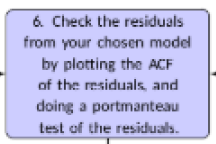

In [ ]:
Image('06BoxJenkins.PNG',width=800)

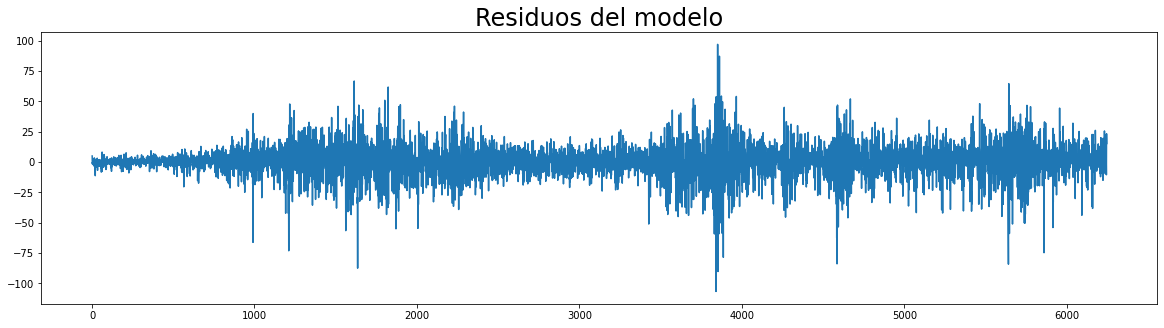

In [ ]:
result11.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

Text(0.5, 1.0, 'Histograma de los residuos del modelo')

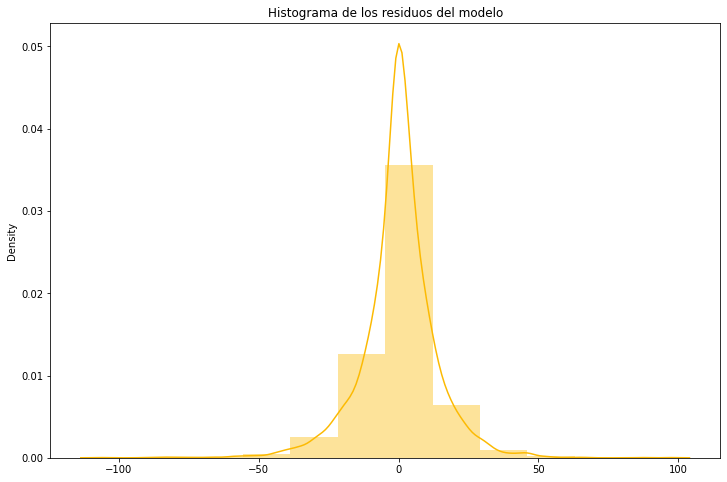

In [ ]:
sns.distplot(result11.resid,bins=12,color='#fcba03')
plt.title('Histograma de los residuos del modelo')

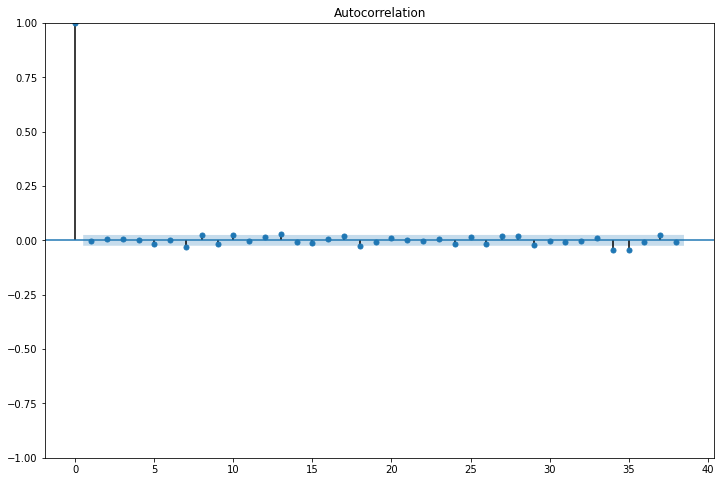

In [ ]:
plot_acf(result11.resid);

In [ ]:
import scipy.stats
import pylab

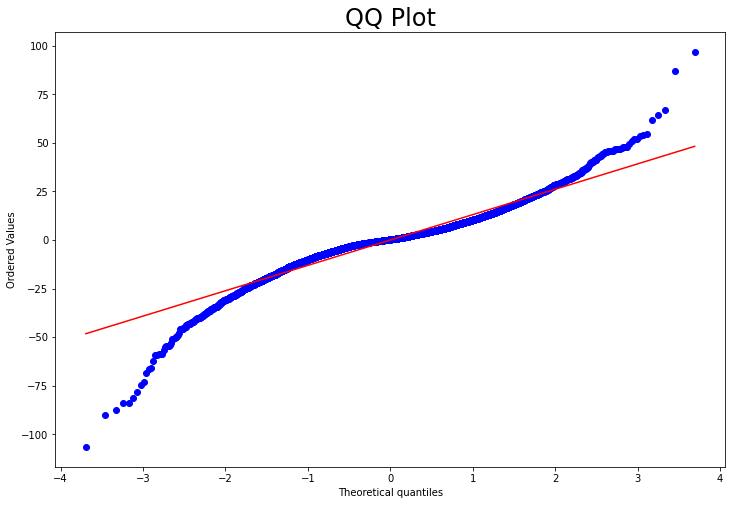

In [ ]:
scipy.stats.probplot(result11.resid, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

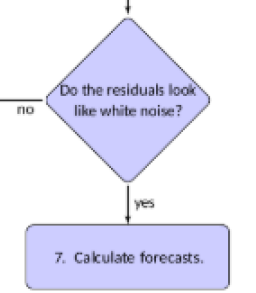

In [ ]:
Image('07BoxJenkins.PNG',width=800)

In [ ]:
forecast,conf_int = stepwise_model2.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])
df_conf["new_index"] = range(6246, 6276)
df_conf = df_conf.set_index("new_index")

In [ ]:
timeseries_evaluation_metrics_func(test_diff, forecast)

Evaluation metric results:-
MSE is : 175.2814959478317
MSE is : 9.782135712602045
RMSE is : 13.239391826962132
MAPE is : inf
R2 is : -0.16701798954526859



In [ ]:
forecast["new_index"] = range(6246, 6276)
forecast = forecast.set_index("new_index")

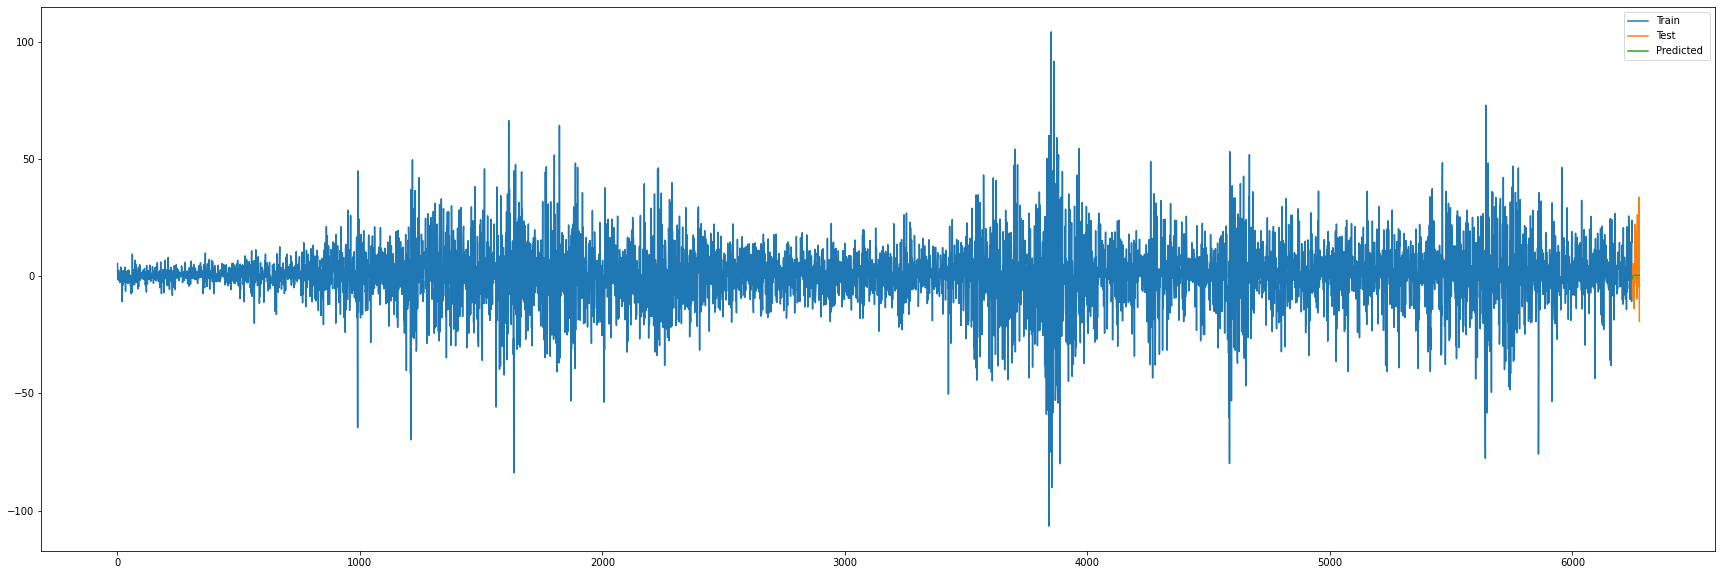

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [30,10]
plt.plot(train_diff, label='Train ')
plt.plot(test_diff, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.legend(loc='best')
plt.show()

😀 Fin del codigo. Gracias